**PART 1**

***PROBLEM***

The NBA is a massive industry where organizations are trying to find and press every advantage they can find to win a championship. Outside of the NBA, bettors are also always trying to find any predictors of team success. The goal of this research is to determine if there are any trends that can be consistently observed in championship winning teams and to create a model that can predict a winner based on team statistics at the end of the regular season. The dataset found at https://www.kaggle.com/datasets/sumitrodatta/nba-aba-baa-stats?select=Team+Totals.csv contains data on team statistics (both for and against) in both per game, and per 100 possessions format. The model in this research will use the data from the per 100 possessions format in order to account for the pace of play. In addition, the dataset contains team information for every season from 1974 to present. The style of play has changed considerably since 1974, which may impact the accuracy of the model. Using the per possession dataset should help account for this. Only using data from the past several years is also an option that could be considered. However, the relative lack of data may cause the model to be less accurate. This will be tested further as the model is being developed. The dataset used does not contain information on championship winners, so that will need to be added in manually.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as skmod
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as sklin
import sklearn.metrics as metrics

In [2]:
stats_for = pd.read_csv("C:/Users/blain/Desktop/DSC550/Team Stats Per 100 Poss.csv")
stats_for

,season,lg,team,abbreviation,playoffs,g,mp,fg_per_100_poss,fga_per_100_poss,fg_percent,...,ft_percent,orb_per_100_poss,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss
0,2023,NBA,Atlanta Hawks,ATL,False,82,19855,43.9,90.9,0.483,...,0.818,11.0,32.6,43.7,24.6,7.0,4.8,12.7,18.5,116.6
1,2023,NBA,Boston Celtics,BOS,False,82,19980,42.2,88.8,0.475,...,0.812,9.7,35.6,45.3,26.7,6.4,5.2,13.4,18.8,118.0
2,2023,NBA,Brooklyn Nets,BRK,False,82,19730,42.0,86.3,0.487,...,0.800,8.3,32.8,41.1,25.9,7.2,6.3,13.9,21.4,115.0
3,2023,NBA,Chicago Bulls,CHI,False,82,19905,42.7,87.1,0.490,...,0.809,8.5,34.0,42.5,24.5,7.9,4.5,13.4,19.0,113.5
4,2023,NBA,Charlotte Hornets,CHO,False,82,19830,40.6,89.0,0.457,...,0.749,10.8,33.0,43.8,24.7,7.6,5.1,14.0,19.9,109.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,1974,ABA,San Antonio Spurs,SAA,True,84,20360,41.5,91.2,0.455,...,0.778,15.3,32.8,48.2,22.4,7.4,2.8,16.5,27.3,101.7
1368,1974,ABA,San Diego Conquistadors,SDA,True,84,20285,42.3,95.6,0.443,...,0.753,15.5,29.6,45.2,21.5,7.5,5.6,14.3,17.8,102.9
1369,1974,NBA,Seattle SuperSonics,SEA,False,82,19755,39.5,88.8,0.445,...,0.767,14.6,29.8,44.4,23.2,7.6,3.2,17.9,22.9,96.8
1370,1974,ABA,Utah Stars,UTS,True,84,20310,42.9,88.8,0.483,...,0.789,13.8,31.6,45.4,22.4,8.4,4.2,17.1,23.2,105.6


In [3]:
stats_against = pd.read_csv("C:/Users/blain/Desktop/DSC550/Opponent Stats Per 100 Poss.csv")
stats_against

,season,lg,team,abbreviation,playoffs,g,mp,opp_fg_per_100_poss,opp_fga_per_100_poss,opp_fg_percent,...,opp_ft_percent,opp_orb_per_100_poss,opp_drb_per_100_poss,opp_trb_per_100_poss,opp_ast_per_100_poss,opp_stl_per_100_poss,opp_blk_per_100_poss,opp_tov_per_100_poss,opp_pf_per_100_poss,opp_pts_per_100_poss
0,2023,NBA,Atlanta Hawks,ATL,False,82,19855,43.1,88.8,0.486,...,0.803,10.4,33.0,43.4,25.6,7.4,5.0,13.9,19.4,116.3
1,2023,NBA,Boston Celtics,BOS,False,82,19980,41.8,90.2,0.463,...,0.769,9.7,34.3,44.0,23.1,6.6,3.9,12.7,19.1,111.5
2,2023,NBA,Brooklyn Nets,BRK,False,82,19730,41.6,89.8,0.463,...,0.767,11.7,34.1,45.8,23.7,7.1,3.9,13.9,18.8,114.1
3,2023,NBA,Chicago Bulls,CHI,False,82,19905,40.9,87.4,0.468,...,0.779,9.7,33.8,43.5,26.1,6.7,4.8,15.1,18.8,112.2
4,2023,NBA,Charlotte Hornets,CHO,False,82,19830,42.3,88.7,0.477,...,0.795,10.7,34.7,45.5,25.5,6.9,5.7,14.1,20.0,115.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,1974,ABA,San Antonio Spurs,SAA,True,84,20360,39.1,86.4,0.452,...,0.759,13.1,31.7,44.8,21.9,7.5,5.1,17.2,24.4,100.8
1368,1974,ABA,San Diego Conquistadors,SDA,True,84,20285,44.6,95.5,0.467,...,0.770,17.3,34.2,51.4,24.0,7.8,4.5,16.1,21.1,105.2
1369,1974,NBA,Seattle SuperSonics,SEA,False,82,19755,39.2,84.6,0.463,...,0.773,12.9,32.3,45.3,24.9,8.1,3.9,19.8,22.2,99.1
1370,1974,ABA,Utah Stars,UTS,True,84,20310,42.8,92.8,0.461,...,0.770,17.1,31.1,48.2,22.0,7.6,3.2,16.4,22.9,105.2


***GRAPHS***

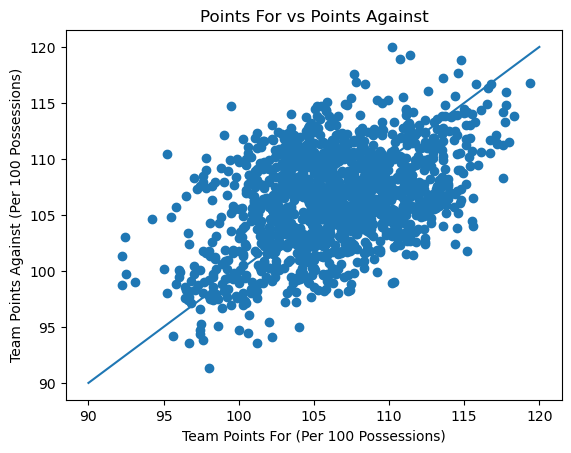

In [4]:
plt.scatter(np.asarray(stats_for['pts_per_100_poss'], float), stats_against['opp_pts_per_100_poss'])
plt.plot([90, 120], [90, 120])
plt.xlabel('Team Points For (Per 100 Possessions)')
plt.ylabel('Team Points Against (Per 100 Possessions)')
plt.title('Points For vs Points Against')
plt.show()

Teams below the line plotted here score more points than they allow in 100 possessions. These teams are better than average, and the teams furthest from the line would be among the best teams, scoring many more point than they allow.

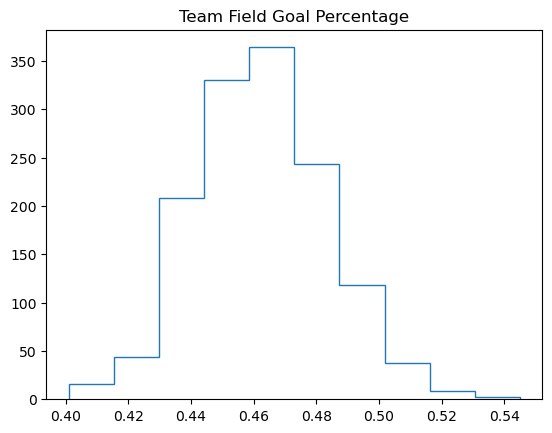

In [5]:
counts, bins = np.histogram(stats_for['fg_percent'])
plt.stairs(counts, bins)
plt.title('Team Field Goal Percentage')
plt.show()

Teams at the highest end of this histogram would be expected to have excellent offenses. If the team is scoring on most of their shots, they're likely winning a lot of their games.

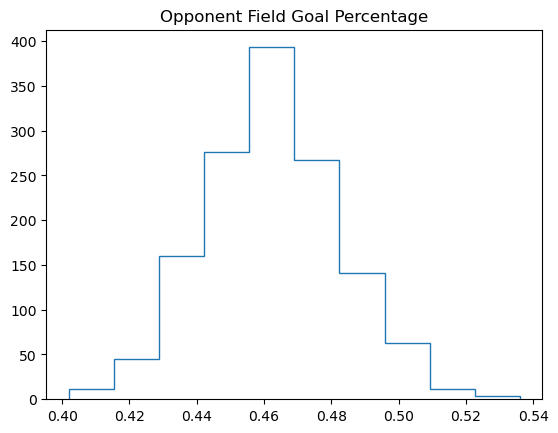

In [6]:
counts, bins = np.histogram(stats_against['opp_fg_percent'])
plt.stairs(counts, bins)
plt.title('Opponent Field Goal Percentage')
plt.show()

Teams at the lowest end of this histogram would be expected to be very good due to their defense. Holding an opponent to a low scoring percentage will often lead to wins, even with an average offense.

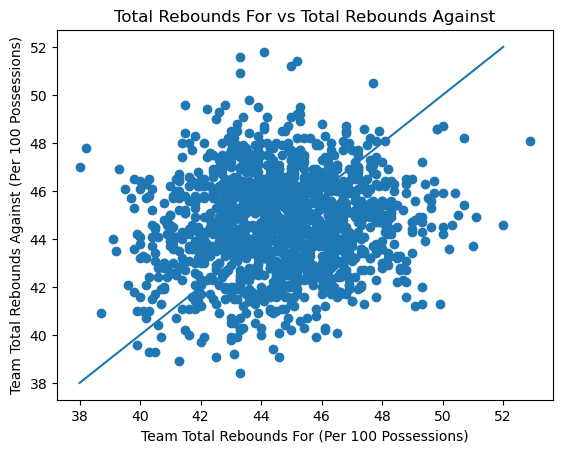

In [7]:
plt.scatter(np.asarray(stats_for['trb_per_100_poss'], float), stats_against['opp_trb_per_100_poss'])
plt.plot([38, 52], [38, 52])
plt.xlabel('Team Total Rebounds For (Per 100 Possessions)')
plt.ylabel('Team Total Rebounds Against (Per 100 Possessions)')
plt.title('Total Rebounds For vs Total Rebounds Against')
plt.show()

Similar to the first graph, teams below the line are controlling the ball off missed shots more often than their opponents, and teams very far from the line are rebounding at a much better rate than their opponents. Rebounds are an important part of the game and may be a decent indicator of team success.

***CONCLUSION***

It can be seen from the graphs above that there should be sufficient spread of data of teams that both under and overperform in certain categories that may be an indicator of success. In addition to finding positive indicators for teams that win the championship, perhaps there are negative indicators that could show what teams are likely incapable of winning a championship.

**Part 2**

In order to create a model that predicts the NBA champion, we need a list of NBA champions, which have been obtained from basketball reference (https://www.basketball-reference.com/playoffs/).

The stats data goes back to 1974, and the list of champions goes back to 1947. A couple major events that could skew results are the NBA-ABA merger in 1977 and the introduction of the 3 point line in 1980. To avoid these, only data since 1980 will be used.

In [8]:
List_of_Champions = pd.read_html('https://www.basketball-reference.com/playoffs/', header=1) [0]
List_of_Champions

,Year,Lg,Champion,Runner-Up,Finals MVP,Unnamed: 5,Points,Rebounds,Assists,Win Shares
0,2023.0,NBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022.0,NBA,Golden State Warriors,Boston Celtics,S. Curry,NaN,J. Tatum (615),A. Horford (214),J. Tatum (148),J. Butler (3.8)
2,2021.0,NBA,Milwaukee Bucks,Phoenix Suns,G. Antetokounmpo,NaN,G. Antetokounmpo (634),G. Antetokounmpo (269),J. Holiday (199),G. Antetokounmpo (3.7)
3,2020.0,NBA,Los Angeles Lakers,Miami Heat,L. James,NaN,A. Davis (582),L. James (226),L. James (184),A. Davis (4.5)
4,2019.0,NBA,Toronto Raptors,Golden State Warriors,K. Leonard,NaN,K. Leonard (732),D. Green (223),D. Green (187),K. Leonard (4.9)
...,...,...,...,...,...,...,...,...,...,...
85,1951.0,NBA,Rochester Royals,New York Knicks,NaN,NaN,A. Risen (273),A. Risen (196),D. McGuire (78),B. Wanzer (2.7)
86,1950.0,NBA,Minneapolis Lakers,Syracuse Nationals,NaN,NaN,G. Mikan (376),NaN,J. Pollard (56),G. Mikan (3.7)
87,1949.0,BAA,Minneapolis Lakers,Washington Capitols,NaN,NaN,G. Mikan (303),NaN,J. Pollard (39),G. Mikan (4.2)
88,1948.0,BAA,Baltimore Bullets,Philadelphia Warriors,NaN,NaN,J. Fulks (282),NaN,H. Dallmar (37),C. Simmons (2.5)


In [9]:
List_of_Champions = List_of_Champions[List_of_Champions['Year'] > 1979]
List_of_Champions = List_of_Champions[List_of_Champions['Year'] < 2023].reset_index(drop = True)
List_of_Champions

,Year,Lg,Champion,Runner-Up,Finals MVP,Unnamed: 5,Points,Rebounds,Assists,Win Shares
0,2022.0,NBA,Golden State Warriors,Boston Celtics,S. Curry,NaN,J. Tatum (615),A. Horford (214),J. Tatum (148),J. Butler (3.8)
1,2021.0,NBA,Milwaukee Bucks,Phoenix Suns,G. Antetokounmpo,NaN,G. Antetokounmpo (634),G. Antetokounmpo (269),J. Holiday (199),G. Antetokounmpo (3.7)
2,2020.0,NBA,Los Angeles Lakers,Miami Heat,L. James,NaN,A. Davis (582),L. James (226),L. James (184),A. Davis (4.5)
3,2019.0,NBA,Toronto Raptors,Golden State Warriors,K. Leonard,NaN,K. Leonard (732),D. Green (223),D. Green (187),K. Leonard (4.9)
4,2018.0,NBA,Golden State Warriors,Cleveland Cavaliers,K. Durant,NaN,L. James (748),D. Green (222),L. James (198),L. James (5.2)
5,2017.0,NBA,Golden State Warriors,Cleveland Cavaliers,K. Durant,NaN,L. James (591),K. Love (191),L. James (141),L. James (4.3)
6,2016.0,NBA,Cleveland Cavaliers,Golden State Warriors,L. James,NaN,K. Thompson (582),D. Green (228),R. Westbrook (198),L. James (4.7)
7,2015.0,NBA,Golden State Warriors,Cleveland Cavaliers,A. Iguodala,NaN,L. James (601),D. Howard (238),L. James (169),S. Curry (3.9)
8,2014.0,NBA,San Antonio Spurs,Miami Heat,K. Leonard,NaN,K. Durant (563),T. Duncan (211),R. Westbrook (153),L. James (4.3)
9,2013.0,NBA,Miami Heat,San Antonio Spurs,L. James,NaN,L. James (596),T. Duncan (214),L. James (152),L. James (5.2)


This dataset is only being used to find champion and runner-up for every season, so most of these columns can be dropped.

In [10]:
List_of_Champions = List_of_Champions[['Year', 'Champion', 'Runner-Up']]
List_of_Champions

,Year,Champion,Runner-Up
0,2022.0,Golden State Warriors,Boston Celtics
1,2021.0,Milwaukee Bucks,Phoenix Suns
2,2020.0,Los Angeles Lakers,Miami Heat
3,2019.0,Toronto Raptors,Golden State Warriors
4,2018.0,Golden State Warriors,Cleveland Cavaliers
5,2017.0,Golden State Warriors,Cleveland Cavaliers
6,2016.0,Cleveland Cavaliers,Golden State Warriors
7,2015.0,Golden State Warriors,Cleveland Cavaliers
8,2014.0,San Antonio Spurs,Miami Heat
9,2013.0,Miami Heat,San Antonio Spurs


In [11]:
List_of_Champions['Year'] = List_of_Champions['Year'].astype(int)
List_of_Champions

C:\Users\blain\AppData\Local\Temp\ipykernel_23100\46025712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  List_of_Champions['Year'] = List_of_Champions['Year'].astype(int)


,Year,Champion,Runner-Up
0,2022,Golden State Warriors,Boston Celtics
1,2021,Milwaukee Bucks,Phoenix Suns
2,2020,Los Angeles Lakers,Miami Heat
3,2019,Toronto Raptors,Golden State Warriors
4,2018,Golden State Warriors,Cleveland Cavaliers
5,2017,Golden State Warriors,Cleveland Cavaliers
6,2016,Cleveland Cavaliers,Golden State Warriors
7,2015,Golden State Warriors,Cleveland Cavaliers
8,2014,San Antonio Spurs,Miami Heat
9,2013,Miami Heat,San Antonio Spurs


Concatenate year with team name for later comparison with stats dataframe to check if a team won or made the finals in any given year.

In [12]:
List_of_Champions['Champion'] = List_of_Champions['Year'].astype(str) + ' ' + List_of_Champions['Champion']
List_of_Champions['Runner-Up'] = List_of_Champions['Year'].astype(str) + ' ' + List_of_Champions['Runner-Up']
List_of_Champions

C:\Users\blain\AppData\Local\Temp\ipykernel_23100\3172127523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  List_of_Champions['Champion'] = List_of_Champions['Year'].astype(str) + ' ' + List_of_Champions['Champion']
C:\Users\blain\AppData\Local\Temp\ipykernel_23100\3172127523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  List_of_Champions['Runner-Up'] = List_of_Champions['Year'].astype(str) + ' ' + List_of_Champions['Runner-Up']


,Year,Champion,Runner-Up
0,2022,2022 Golden State Warriors,2022 Boston Celtics
1,2021,2021 Milwaukee Bucks,2021 Phoenix Suns
2,2020,2020 Los Angeles Lakers,2020 Miami Heat
3,2019,2019 Toronto Raptors,2019 Golden State Warriors
4,2018,2018 Golden State Warriors,2018 Cleveland Cavaliers
5,2017,2017 Golden State Warriors,2017 Cleveland Cavaliers
6,2016,2016 Cleveland Cavaliers,2016 Golden State Warriors
7,2015,2015 Golden State Warriors,2015 Cleveland Cavaliers
8,2014,2014 San Antonio Spurs,2014 Miami Heat
9,2013,2013 Miami Heat,2013 San Antonio Spurs


Merge the stats for and stats against dataframes on all common columns to obtain a single dataframe with all stats adjusted for pace of play.

In [13]:
Stats = pd.merge(stats_for, stats_against,  how='left', left_on=['season', 'lg', 'team', 'abbreviation', 'playoffs', 'g', 'mp'], right_on = ['season', 'lg', 'team', 'abbreviation', 'playoffs', 'g', 'mp'])
Stats

,season,lg,team,abbreviation,playoffs,g,mp,fg_per_100_poss,fga_per_100_poss,fg_percent,...,opp_ft_percent,opp_orb_per_100_poss,opp_drb_per_100_poss,opp_trb_per_100_poss,opp_ast_per_100_poss,opp_stl_per_100_poss,opp_blk_per_100_poss,opp_tov_per_100_poss,opp_pf_per_100_poss,opp_pts_per_100_poss
0,2023,NBA,Atlanta Hawks,ATL,False,82,19855,43.9,90.9,0.483,...,0.803,10.4,33.0,43.4,25.6,7.4,5.0,13.9,19.4,116.3
1,2023,NBA,Boston Celtics,BOS,False,82,19980,42.2,88.8,0.475,...,0.769,9.7,34.3,44.0,23.1,6.6,3.9,12.7,19.1,111.5
2,2023,NBA,Brooklyn Nets,BRK,False,82,19730,42.0,86.3,0.487,...,0.767,11.7,34.1,45.8,23.7,7.1,3.9,13.9,18.8,114.1
3,2023,NBA,Chicago Bulls,CHI,False,82,19905,42.7,87.1,0.490,...,0.779,9.7,33.8,43.5,26.1,6.7,4.8,15.1,18.8,112.2
4,2023,NBA,Charlotte Hornets,CHO,False,82,19830,40.6,89.0,0.457,...,0.795,10.7,34.7,45.5,25.5,6.9,5.7,14.1,20.0,115.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,1974,ABA,San Antonio Spurs,SAA,True,84,20360,41.5,91.2,0.455,...,0.759,13.1,31.7,44.8,21.9,7.5,5.1,17.2,24.4,100.8
1368,1974,ABA,San Diego Conquistadors,SDA,True,84,20285,42.3,95.6,0.443,...,0.770,17.3,34.2,51.4,24.0,7.8,4.5,16.1,21.1,105.2
1369,1974,NBA,Seattle SuperSonics,SEA,False,82,19755,39.5,88.8,0.445,...,0.773,12.9,32.3,45.3,24.9,8.1,3.9,19.8,22.2,99.1
1370,1974,ABA,Utah Stars,UTS,True,84,20310,42.9,88.8,0.483,...,0.770,17.1,31.1,48.2,22.0,7.6,3.2,16.4,22.9,105.2


Add 2 boolean columns to indicate whether a team made or won the finals. Teams that win the finals will be true for both.

In [14]:
pd.set_option('display.max_columns', None)
Stats['champion'] = 0
Stats['finals'] = 0
Stats

,season,lg,team,abbreviation,playoffs,g,mp,fg_per_100_poss,fga_per_100_poss,fg_percent,x3p_per_100_poss,x3pa_per_100_poss,x3p_percent,x2p_per_100_poss,x2pa_per_100_poss,x2p_percent,ft_per_100_poss,fta_per_100_poss,ft_percent,orb_per_100_poss,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,opp_fg_per_100_poss,opp_fga_per_100_poss,opp_fg_percent,opp_x3p_per_100_poss,opp_x3pa_per_100_poss,opp_x3p_percent,opp_x2p_per_100_poss,opp_x2pa_per_100_poss,opp_x2p_percent,opp_ft_per_100_poss,opp_fta_per_100_poss,opp_ft_percent,opp_orb_per_100_poss,opp_drb_per_100_poss,opp_trb_per_100_poss,opp_ast_per_100_poss,opp_stl_per_100_poss,opp_blk_per_100_poss,opp_tov_per_100_poss,opp_pf_per_100_poss,opp_pts_per_100_poss,champion,finals
0,2023,NBA,Atlanta Hawks,ATL,False,82,19855,43.9,90.9,0.483,10.6,30.1,0.352,33.3,60.9,0.548,18.2,22.2,0.818,11.0,32.6,43.7,24.6,7.0,4.8,12.7,18.5,116.6,43.1,88.8,0.486,11.8,33.0,0.356,31.4,55.8,0.562,18.3,22.8,0.803,10.4,33.0,43.4,25.6,7.4,5.0,13.9,19.4,116.3,0,0
1,2023,NBA,Boston Celtics,BOS,False,82,19980,42.2,88.8,0.475,16.0,42.6,0.377,26.2,46.2,0.567,17.5,21.6,0.812,9.7,35.6,45.3,26.7,6.4,5.2,13.4,18.8,118.0,41.8,90.2,0.463,11.6,33.7,0.345,30.1,56.5,0.534,16.2,21.1,0.769,9.7,34.3,44.0,23.1,6.6,3.9,12.7,19.1,111.5,0,0
2,2023,NBA,Brooklyn Nets,BRK,False,82,19730,42.0,86.3,0.487,13.0,34.3,0.378,29.1,52.0,0.559,17.9,22.4,0.800,8.3,32.8,41.1,25.9,7.2,6.3,13.9,21.4,115.0,41.6,89.8,0.463,12.0,32.7,0.367,29.6,57.1,0.518,19.0,24.8,0.767,11.7,34.1,45.8,23.7,7.1,3.9,13.9,18.8,114.1,0,0
3,2023,NBA,Chicago Bulls,CHI,False,82,19905,42.7,87.1,0.490,10.4,29.0,0.361,32.2,58.1,0.555,17.7,21.9,0.809,8.5,34.0,42.5,24.5,7.9,4.5,13.4,19.0,113.5,40.9,87.4,0.468,13.3,37.2,0.357,27.6,50.2,0.550,17.2,22.1,0.779,9.7,33.8,43.5,26.1,6.7,4.8,15.1,18.8,112.2,0,0
4,2023,NBA,Charlotte Hornets,CHO,False,82,19830,40.6,89.0,0.457,10.6,32.0,0.330,30.1,56.9,0.528,17.4,23.2,0.749,10.8,33.0,43.8,24.7,7.6,5.1,14.0,19.9,109.2,42.3,88.7,0.477,12.0,33.7,0.357,30.2,55.0,0.550,18.7,23.6,0.795,10.7,34.7,45.5,25.5,6.9,5.7,14.1,20.0,115.3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,1974,ABA,San Antonio Spurs,SAA,True,84,20360,41.5,91.2,0.455,0.6,3.0,0.212,40.8,88.2,0.463,18.1,23.3,0.778,15.3,32.8,48.2,22.4,7.4,2.8,16.5,27.3,101.7,39.1,86.4,0.452,1.3,4.6,0.288,37.7,81.8,0.461,21.4,28.1,0.759,13.1,31.7,44.8,21.9,7.5,5.1,17.2,24.4,100.8,0,0
1368,1974,ABA,San Diego Conquistadors,SDA,True,84,20285,42.3,95.6,0.443,2.3,8.0,0.293,40.0,87.6,0.456,16.0,21.2,0.753,15.5,29.6,45.2,21.5,7.5,5.6,14.3,17.8,102.9,44.6,95.5,0.467,1.0,3.8,0.249,43.7,91.7,0.476,15.0,19.5,0.770,17.3,34.2,51.4,24.0,7.8,4.5,16.1,21.1,105.2,0,0
1369,1974,NBA,Seattle SuperSonics,SEA,False,82,19755,39.5,88.8,0.445,NaN,NaN,NaN,39.5,88.8,0.445,17.7,23.1,0.767,14.6,29.8,44.4,23.2,7.6,3.2,17.9,22.9,96.8,39.2,84.6,0.463,NaN,NaN,NaN,39.2,84.6,0.463,20.7,26.8,0.773,12.9,32.3,45.3,24.9,8.1,3.9,19.8,22.2,99.1,0,0
1370,1974,ABA,Utah Stars,UTS,True,84,20310,42.9,88.8,0.483,1.1,4.1,0.272,41.7,84.6,0.493,18.7,23.7,0.789,13.8,31.6,45.4,22.4,8.4,4.2,17.1,23.2,105.6,42.8,92.8,0.461,1.7,5.4,0.312,41.1,87.4,0.471,18.0,23.3,0.770,17.1,31.1,48.2,22.0,7.6,3.2,16.4,22.9,105.2,0,0


Re-organize the dataframe to move the finals and champion columns to the front of the dataframe and drop columns that won't be used in training the model (lg, abbreviation, g, mp).

In [15]:
Stats = Stats[['season', 'team', 'playoffs', 'finals', 'champion', 'fg_per_100_poss', 'fga_per_100_poss', 'fg_percent', 'x3p_per_100_poss', 'x3pa_per_100_poss', 'x3p_percent', 'x2p_per_100_poss', 'x2pa_per_100_poss', 'x2p_percent', 'ft_per_100_poss', 'fta_per_100_poss', 'ft_percent', 'orb_per_100_poss', 'drb_per_100_poss', 'trb_per_100_poss', 'ast_per_100_poss', 'stl_per_100_poss', 'blk_per_100_poss', 'tov_per_100_poss', 'pf_per_100_poss', 'pts_per_100_poss', 'opp_fg_per_100_poss', 'opp_fga_per_100_poss', 'opp_fg_percent', 'opp_x3p_per_100_poss', 'opp_x3pa_per_100_poss', 'opp_x3p_percent', 'opp_x2p_per_100_poss', 'opp_x2pa_per_100_poss', 'opp_x2p_percent', 'opp_ft_per_100_poss', 'opp_fta_per_100_poss', 'opp_ft_percent', 'opp_orb_per_100_poss', 'opp_drb_per_100_poss', 'opp_trb_per_100_poss', 'opp_ast_per_100_poss', 'opp_stl_per_100_poss', 'opp_blk_per_100_poss', 'opp_tov_per_100_poss', 'opp_pf_per_100_poss', 'opp_pts_per_100_poss']]
Stats

,season,team,playoffs,finals,champion,fg_per_100_poss,fga_per_100_poss,fg_percent,x3p_per_100_poss,x3pa_per_100_poss,x3p_percent,x2p_per_100_poss,x2pa_per_100_poss,x2p_percent,ft_per_100_poss,fta_per_100_poss,ft_percent,orb_per_100_poss,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,opp_fg_per_100_poss,opp_fga_per_100_poss,opp_fg_percent,opp_x3p_per_100_poss,opp_x3pa_per_100_poss,opp_x3p_percent,opp_x2p_per_100_poss,opp_x2pa_per_100_poss,opp_x2p_percent,opp_ft_per_100_poss,opp_fta_per_100_poss,opp_ft_percent,opp_orb_per_100_poss,opp_drb_per_100_poss,opp_trb_per_100_poss,opp_ast_per_100_poss,opp_stl_per_100_poss,opp_blk_per_100_poss,opp_tov_per_100_poss,opp_pf_per_100_poss,opp_pts_per_100_poss
0,2023,Atlanta Hawks,False,0,0,43.9,90.9,0.483,10.6,30.1,0.352,33.3,60.9,0.548,18.2,22.2,0.818,11.0,32.6,43.7,24.6,7.0,4.8,12.7,18.5,116.6,43.1,88.8,0.486,11.8,33.0,0.356,31.4,55.8,0.562,18.3,22.8,0.803,10.4,33.0,43.4,25.6,7.4,5.0,13.9,19.4,116.3
1,2023,Boston Celtics,False,0,0,42.2,88.8,0.475,16.0,42.6,0.377,26.2,46.2,0.567,17.5,21.6,0.812,9.7,35.6,45.3,26.7,6.4,5.2,13.4,18.8,118.0,41.8,90.2,0.463,11.6,33.7,0.345,30.1,56.5,0.534,16.2,21.1,0.769,9.7,34.3,44.0,23.1,6.6,3.9,12.7,19.1,111.5
2,2023,Brooklyn Nets,False,0,0,42.0,86.3,0.487,13.0,34.3,0.378,29.1,52.0,0.559,17.9,22.4,0.800,8.3,32.8,41.1,25.9,7.2,6.3,13.9,21.4,115.0,41.6,89.8,0.463,12.0,32.7,0.367,29.6,57.1,0.518,19.0,24.8,0.767,11.7,34.1,45.8,23.7,7.1,3.9,13.9,18.8,114.1
3,2023,Chicago Bulls,False,0,0,42.7,87.1,0.490,10.4,29.0,0.361,32.2,58.1,0.555,17.7,21.9,0.809,8.5,34.0,42.5,24.5,7.9,4.5,13.4,19.0,113.5,40.9,87.4,0.468,13.3,37.2,0.357,27.6,50.2,0.550,17.2,22.1,0.779,9.7,33.8,43.5,26.1,6.7,4.8,15.1,18.8,112.2
4,2023,Charlotte Hornets,False,0,0,40.6,89.0,0.457,10.6,32.0,0.330,30.1,56.9,0.528,17.4,23.2,0.749,10.8,33.0,43.8,24.7,7.6,5.1,14.0,19.9,109.2,42.3,88.7,0.477,12.0,33.7,0.357,30.2,55.0,0.550,18.7,23.6,0.795,10.7,34.7,45.5,25.5,6.9,5.7,14.1,20.0,115.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,1974,San Antonio Spurs,True,0,0,41.5,91.2,0.455,0.6,3.0,0.212,40.8,88.2,0.463,18.1,23.3,0.778,15.3,32.8,48.2,22.4,7.4,2.8,16.5,27.3,101.7,39.1,86.4,0.452,1.3,4.6,0.288,37.7,81.8,0.461,21.4,28.1,0.759,13.1,31.7,44.8,21.9,7.5,5.1,17.2,24.4,100.8
1368,1974,San Diego Conquistadors,True,0,0,42.3,95.6,0.443,2.3,8.0,0.293,40.0,87.6,0.456,16.0,21.2,0.753,15.5,29.6,45.2,21.5,7.5,5.6,14.3,17.8,102.9,44.6,95.5,0.467,1.0,3.8,0.249,43.7,91.7,0.476,15.0,19.5,0.770,17.3,34.2,51.4,24.0,7.8,4.5,16.1,21.1,105.2
1369,1974,Seattle SuperSonics,False,0,0,39.5,88.8,0.445,NaN,NaN,NaN,39.5,88.8,0.445,17.7,23.1,0.767,14.6,29.8,44.4,23.2,7.6,3.2,17.9,22.9,96.8,39.2,84.6,0.463,NaN,NaN,NaN,39.2,84.6,0.463,20.7,26.8,0.773,12.9,32.3,45.3,24.9,8.1,3.9,19.8,22.2,99.1
1370,1974,Utah Stars,True,0,0,42.9,88.8,0.483,1.1,4.1,0.272,41.7,84.6,0.493,18.7,23.7,0.789,13.8,31.6,45.4,22.4,8.4,4.2,17.1,23.2,105.6,42.8,92.8,0.461,1.7,5.4,0.312,41.1,87.4,0.471,18.0,23.3,0.770,17.1,31.1,48.2,22.0,7.6,3.2,16.4,22.9,105.2


Drop data from before 1980 and this season. As stated before, we don't want any data from before the introduction of the 3 point line. We're also dropping this season since no champion has been determined yet.

Store the stats from this season as a separate dataframe. We can try to apply the trained model to the data later in an attempt to predict winner.

In [16]:
Stats = Stats[Stats['season'] > 1979]
Stats_2023 = Stats[Stats['season'] == 2023]
Stats = Stats[Stats['season'] < 2023].reset_index(drop = True)
Stats

,season,team,playoffs,finals,champion,fg_per_100_poss,fga_per_100_poss,fg_percent,x3p_per_100_poss,x3pa_per_100_poss,x3p_percent,x2p_per_100_poss,x2pa_per_100_poss,x2p_percent,ft_per_100_poss,fta_per_100_poss,ft_percent,orb_per_100_poss,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,opp_fg_per_100_poss,opp_fga_per_100_poss,opp_fg_percent,opp_x3p_per_100_poss,opp_x3pa_per_100_poss,opp_x3p_percent,opp_x2p_per_100_poss,opp_x2pa_per_100_poss,opp_x2p_percent,opp_ft_per_100_poss,opp_fta_per_100_poss,opp_ft_percent,opp_orb_per_100_poss,opp_drb_per_100_poss,opp_trb_per_100_poss,opp_ast_per_100_poss,opp_stl_per_100_poss,opp_blk_per_100_poss,opp_tov_per_100_poss,opp_pf_per_100_poss,opp_pts_per_100_poss
0,2022,Atlanta Hawks,True,0,0,42.4,90.3,0.470,13.2,35.2,0.374,29.2,55.1,0.531,18.5,22.8,0.812,10.3,34.7,45.0,25.2,7.3,4.3,12.1,19.1,116.5,42.8,91.0,0.471,13.1,36.0,0.364,29.7,54.9,0.541,16.1,20.4,0.792,10.4,34.4,44.8,26.0,7.2,4.6,13.0,20.8,114.9
1,2022,Boston Celtics,True,0,0,41.7,89.5,0.466,13.5,38.0,0.356,28.2,51.5,0.547,17.4,21.4,0.816,10.8,36.4,47.2,25.4,7.4,6.0,14.0,19.0,114.4,39.2,90.1,0.434,12.1,35.7,0.339,27.1,54.4,0.497,16.5,21.1,0.783,10.7,34.0,44.7,22.1,7.7,4.7,14.1,19.9,106.9
2,2022,Brooklyn Nets,True,0,0,42.2,89.0,0.475,11.5,31.9,0.361,30.7,57.0,0.538,17.6,21.9,0.805,10.4,34.3,44.7,25.4,7.1,5.5,14.1,20.5,113.6,41.0,90.7,0.452,12.6,36.5,0.345,28.4,54.2,0.523,18.3,23.2,0.788,11.4,33.0,44.4,24.0,8.0,4.9,13.3,19.8,112.8
3,2022,Chicago Bulls,True,0,0,42.3,88.2,0.480,10.8,29.3,0.369,31.6,58.9,0.535,17.8,21.9,0.813,8.8,34.2,42.9,24.2,7.2,4.2,13.0,19.1,113.2,42.0,88.7,0.474,11.9,32.4,0.366,30.2,56.3,0.536,17.7,22.3,0.795,9.5,34.4,43.8,25.4,7.2,5.1,13.3,18.4,113.6
4,2022,Charlotte Hornets,False,0,0,42.3,90.5,0.468,13.8,37.8,0.365,28.5,52.7,0.542,15.7,21.2,0.740,10.7,33.4,44.1,27.8,8.5,4.9,13.1,19.7,114.1,41.6,89.2,0.466,13.9,38.3,0.362,27.7,50.9,0.544,16.7,21.9,0.763,11.2,35.2,46.5,26.2,7.4,4.6,14.8,19.4,113.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,1980,San Antonio Spurs,True,0,0,42.8,85.9,0.498,0.6,2.3,0.252,42.2,83.6,0.505,22.5,28.1,0.801,12.8,27.9,40.7,25.8,8.6,3.7,17.6,23.3,108.6,44.4,88.7,0.500,1.0,3.2,0.306,43.4,85.6,0.507,19.2,25.3,0.758,13.8,27.4,41.3,28.2,9.2,5.1,16.8,24.3,109.0
1190,1980,San Diego Clippers,False,0,0,42.2,89.8,0.470,2.1,6.5,0.326,40.1,83.3,0.482,19.1,26.0,0.736,15.5,27.7,43.2,20.2,8.0,3.5,17.3,22.7,105.7,45.0,90.0,0.500,0.5,2.2,0.230,44.4,87.7,0.507,19.3,25.0,0.773,14.6,29.8,44.4,24.1,9.2,4.9,16.7,22.6,109.8
1191,1980,Seattle SuperSonics,True,0,0,42.3,89.9,0.470,0.7,2.2,0.312,41.5,87.7,0.474,20.6,26.8,0.768,16.4,30.3,46.7,24.3,8.9,5.1,17.8,22.2,105.8,40.5,88.3,0.459,0.7,2.9,0.246,39.8,85.4,0.466,19.5,25.5,0.764,14.3,28.6,42.9,24.0,8.7,4.7,18.1,23.7,101.2
1192,1980,Utah Jazz,False,0,0,42.0,84.7,0.496,0.7,2.3,0.319,41.3,82.4,0.501,19.5,24.1,0.809,12.0,29.3,41.3,24.9,8.1,4.5,19.2,24.9,104.2,44.2,89.2,0.496,0.8,2.6,0.318,43.4,86.6,0.501,21.1,27.4,0.772,14.4,28.4,42.8,24.8,8.8,4.9,15.8,22.1,110.4


Concatenate season with team in order to match with the list of champions dataframe created earlier.

In [17]:
Stats['team'] = Stats['season'].astype(str) + ' ' + Stats['team']
Stats

,season,team,playoffs,finals,champion,fg_per_100_poss,fga_per_100_poss,fg_percent,x3p_per_100_poss,x3pa_per_100_poss,x3p_percent,x2p_per_100_poss,x2pa_per_100_poss,x2p_percent,ft_per_100_poss,fta_per_100_poss,ft_percent,orb_per_100_poss,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,opp_fg_per_100_poss,opp_fga_per_100_poss,opp_fg_percent,opp_x3p_per_100_poss,opp_x3pa_per_100_poss,opp_x3p_percent,opp_x2p_per_100_poss,opp_x2pa_per_100_poss,opp_x2p_percent,opp_ft_per_100_poss,opp_fta_per_100_poss,opp_ft_percent,opp_orb_per_100_poss,opp_drb_per_100_poss,opp_trb_per_100_poss,opp_ast_per_100_poss,opp_stl_per_100_poss,opp_blk_per_100_poss,opp_tov_per_100_poss,opp_pf_per_100_poss,opp_pts_per_100_poss
0,2022,2022 Atlanta Hawks,True,0,0,42.4,90.3,0.470,13.2,35.2,0.374,29.2,55.1,0.531,18.5,22.8,0.812,10.3,34.7,45.0,25.2,7.3,4.3,12.1,19.1,116.5,42.8,91.0,0.471,13.1,36.0,0.364,29.7,54.9,0.541,16.1,20.4,0.792,10.4,34.4,44.8,26.0,7.2,4.6,13.0,20.8,114.9
1,2022,2022 Boston Celtics,True,0,0,41.7,89.5,0.466,13.5,38.0,0.356,28.2,51.5,0.547,17.4,21.4,0.816,10.8,36.4,47.2,25.4,7.4,6.0,14.0,19.0,114.4,39.2,90.1,0.434,12.1,35.7,0.339,27.1,54.4,0.497,16.5,21.1,0.783,10.7,34.0,44.7,22.1,7.7,4.7,14.1,19.9,106.9
2,2022,2022 Brooklyn Nets,True,0,0,42.2,89.0,0.475,11.5,31.9,0.361,30.7,57.0,0.538,17.6,21.9,0.805,10.4,34.3,44.7,25.4,7.1,5.5,14.1,20.5,113.6,41.0,90.7,0.452,12.6,36.5,0.345,28.4,54.2,0.523,18.3,23.2,0.788,11.4,33.0,44.4,24.0,8.0,4.9,13.3,19.8,112.8
3,2022,2022 Chicago Bulls,True,0,0,42.3,88.2,0.480,10.8,29.3,0.369,31.6,58.9,0.535,17.8,21.9,0.813,8.8,34.2,42.9,24.2,7.2,4.2,13.0,19.1,113.2,42.0,88.7,0.474,11.9,32.4,0.366,30.2,56.3,0.536,17.7,22.3,0.795,9.5,34.4,43.8,25.4,7.2,5.1,13.3,18.4,113.6
4,2022,2022 Charlotte Hornets,False,0,0,42.3,90.5,0.468,13.8,37.8,0.365,28.5,52.7,0.542,15.7,21.2,0.740,10.7,33.4,44.1,27.8,8.5,4.9,13.1,19.7,114.1,41.6,89.2,0.466,13.9,38.3,0.362,27.7,50.9,0.544,16.7,21.9,0.763,11.2,35.2,46.5,26.2,7.4,4.6,14.8,19.4,113.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,1980,1980 San Antonio Spurs,True,0,0,42.8,85.9,0.498,0.6,2.3,0.252,42.2,83.6,0.505,22.5,28.1,0.801,12.8,27.9,40.7,25.8,8.6,3.7,17.6,23.3,108.6,44.4,88.7,0.500,1.0,3.2,0.306,43.4,85.6,0.507,19.2,25.3,0.758,13.8,27.4,41.3,28.2,9.2,5.1,16.8,24.3,109.0
1190,1980,1980 San Diego Clippers,False,0,0,42.2,89.8,0.470,2.1,6.5,0.326,40.1,83.3,0.482,19.1,26.0,0.736,15.5,27.7,43.2,20.2,8.0,3.5,17.3,22.7,105.7,45.0,90.0,0.500,0.5,2.2,0.230,44.4,87.7,0.507,19.3,25.0,0.773,14.6,29.8,44.4,24.1,9.2,4.9,16.7,22.6,109.8
1191,1980,1980 Seattle SuperSonics,True,0,0,42.3,89.9,0.470,0.7,2.2,0.312,41.5,87.7,0.474,20.6,26.8,0.768,16.4,30.3,46.7,24.3,8.9,5.1,17.8,22.2,105.8,40.5,88.3,0.459,0.7,2.9,0.246,39.8,85.4,0.466,19.5,25.5,0.764,14.3,28.6,42.9,24.0,8.7,4.7,18.1,23.7,101.2
1192,1980,1980 Utah Jazz,False,0,0,42.0,84.7,0.496,0.7,2.3,0.319,41.3,82.4,0.501,19.5,24.1,0.809,12.0,29.3,41.3,24.9,8.1,4.5,19.2,24.9,104.2,44.2,89.2,0.496,0.8,2.6,0.318,43.4,86.6,0.501,21.1,27.4,0.772,14.4,28.4,42.8,24.8,8.8,4.9,15.8,22.1,110.4


Change the playoffs value from boolean to integer for training the model (in case a model is created to determine what makes a playoff team).

In [18]:
Stats['playoffs'] = Stats['playoffs'].astype(int)
Stats

,season,team,playoffs,finals,champion,fg_per_100_poss,fga_per_100_poss,fg_percent,x3p_per_100_poss,x3pa_per_100_poss,x3p_percent,x2p_per_100_poss,x2pa_per_100_poss,x2p_percent,ft_per_100_poss,fta_per_100_poss,ft_percent,orb_per_100_poss,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,opp_fg_per_100_poss,opp_fga_per_100_poss,opp_fg_percent,opp_x3p_per_100_poss,opp_x3pa_per_100_poss,opp_x3p_percent,opp_x2p_per_100_poss,opp_x2pa_per_100_poss,opp_x2p_percent,opp_ft_per_100_poss,opp_fta_per_100_poss,opp_ft_percent,opp_orb_per_100_poss,opp_drb_per_100_poss,opp_trb_per_100_poss,opp_ast_per_100_poss,opp_stl_per_100_poss,opp_blk_per_100_poss,opp_tov_per_100_poss,opp_pf_per_100_poss,opp_pts_per_100_poss
0,2022,2022 Atlanta Hawks,1,0,0,42.4,90.3,0.470,13.2,35.2,0.374,29.2,55.1,0.531,18.5,22.8,0.812,10.3,34.7,45.0,25.2,7.3,4.3,12.1,19.1,116.5,42.8,91.0,0.471,13.1,36.0,0.364,29.7,54.9,0.541,16.1,20.4,0.792,10.4,34.4,44.8,26.0,7.2,4.6,13.0,20.8,114.9
1,2022,2022 Boston Celtics,1,0,0,41.7,89.5,0.466,13.5,38.0,0.356,28.2,51.5,0.547,17.4,21.4,0.816,10.8,36.4,47.2,25.4,7.4,6.0,14.0,19.0,114.4,39.2,90.1,0.434,12.1,35.7,0.339,27.1,54.4,0.497,16.5,21.1,0.783,10.7,34.0,44.7,22.1,7.7,4.7,14.1,19.9,106.9
2,2022,2022 Brooklyn Nets,1,0,0,42.2,89.0,0.475,11.5,31.9,0.361,30.7,57.0,0.538,17.6,21.9,0.805,10.4,34.3,44.7,25.4,7.1,5.5,14.1,20.5,113.6,41.0,90.7,0.452,12.6,36.5,0.345,28.4,54.2,0.523,18.3,23.2,0.788,11.4,33.0,44.4,24.0,8.0,4.9,13.3,19.8,112.8
3,2022,2022 Chicago Bulls,1,0,0,42.3,88.2,0.480,10.8,29.3,0.369,31.6,58.9,0.535,17.8,21.9,0.813,8.8,34.2,42.9,24.2,7.2,4.2,13.0,19.1,113.2,42.0,88.7,0.474,11.9,32.4,0.366,30.2,56.3,0.536,17.7,22.3,0.795,9.5,34.4,43.8,25.4,7.2,5.1,13.3,18.4,113.6
4,2022,2022 Charlotte Hornets,0,0,0,42.3,90.5,0.468,13.8,37.8,0.365,28.5,52.7,0.542,15.7,21.2,0.740,10.7,33.4,44.1,27.8,8.5,4.9,13.1,19.7,114.1,41.6,89.2,0.466,13.9,38.3,0.362,27.7,50.9,0.544,16.7,21.9,0.763,11.2,35.2,46.5,26.2,7.4,4.6,14.8,19.4,113.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,1980,1980 San Antonio Spurs,1,0,0,42.8,85.9,0.498,0.6,2.3,0.252,42.2,83.6,0.505,22.5,28.1,0.801,12.8,27.9,40.7,25.8,8.6,3.7,17.6,23.3,108.6,44.4,88.7,0.500,1.0,3.2,0.306,43.4,85.6,0.507,19.2,25.3,0.758,13.8,27.4,41.3,28.2,9.2,5.1,16.8,24.3,109.0
1190,1980,1980 San Diego Clippers,0,0,0,42.2,89.8,0.470,2.1,6.5,0.326,40.1,83.3,0.482,19.1,26.0,0.736,15.5,27.7,43.2,20.2,8.0,3.5,17.3,22.7,105.7,45.0,90.0,0.500,0.5,2.2,0.230,44.4,87.7,0.507,19.3,25.0,0.773,14.6,29.8,44.4,24.1,9.2,4.9,16.7,22.6,109.8
1191,1980,1980 Seattle SuperSonics,1,0,0,42.3,89.9,0.470,0.7,2.2,0.312,41.5,87.7,0.474,20.6,26.8,0.768,16.4,30.3,46.7,24.3,8.9,5.1,17.8,22.2,105.8,40.5,88.3,0.459,0.7,2.9,0.246,39.8,85.4,0.466,19.5,25.5,0.764,14.3,28.6,42.9,24.0,8.7,4.7,18.1,23.7,101.2
1192,1980,1980 Utah Jazz,0,0,0,42.0,84.7,0.496,0.7,2.3,0.319,41.3,82.4,0.501,19.5,24.1,0.809,12.0,29.3,41.3,24.9,8.1,4.5,19.2,24.9,104.2,44.2,89.2,0.496,0.8,2.6,0.318,43.4,86.6,0.501,21.1,27.4,0.772,14.4,28.4,42.8,24.8,8.8,4.9,15.8,22.1,110.4


Change the finals and champion columns to be true where applicable, based on the data gathered from basketball reference.

In [19]:
Stats['champion'] = Stats['team'].isin(List_of_Champions['Champion']).astype(int)
Stats['finals'] = Stats['team'].isin(List_of_Champions.stack()).astype(int)
Stats

,season,team,playoffs,finals,champion,fg_per_100_poss,fga_per_100_poss,fg_percent,x3p_per_100_poss,x3pa_per_100_poss,x3p_percent,x2p_per_100_poss,x2pa_per_100_poss,x2p_percent,ft_per_100_poss,fta_per_100_poss,ft_percent,orb_per_100_poss,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,opp_fg_per_100_poss,opp_fga_per_100_poss,opp_fg_percent,opp_x3p_per_100_poss,opp_x3pa_per_100_poss,opp_x3p_percent,opp_x2p_per_100_poss,opp_x2pa_per_100_poss,opp_x2p_percent,opp_ft_per_100_poss,opp_fta_per_100_poss,opp_ft_percent,opp_orb_per_100_poss,opp_drb_per_100_poss,opp_trb_per_100_poss,opp_ast_per_100_poss,opp_stl_per_100_poss,opp_blk_per_100_poss,opp_tov_per_100_poss,opp_pf_per_100_poss,opp_pts_per_100_poss
0,2022,2022 Atlanta Hawks,1,0,0,42.4,90.3,0.470,13.2,35.2,0.374,29.2,55.1,0.531,18.5,22.8,0.812,10.3,34.7,45.0,25.2,7.3,4.3,12.1,19.1,116.5,42.8,91.0,0.471,13.1,36.0,0.364,29.7,54.9,0.541,16.1,20.4,0.792,10.4,34.4,44.8,26.0,7.2,4.6,13.0,20.8,114.9
1,2022,2022 Boston Celtics,1,1,0,41.7,89.5,0.466,13.5,38.0,0.356,28.2,51.5,0.547,17.4,21.4,0.816,10.8,36.4,47.2,25.4,7.4,6.0,14.0,19.0,114.4,39.2,90.1,0.434,12.1,35.7,0.339,27.1,54.4,0.497,16.5,21.1,0.783,10.7,34.0,44.7,22.1,7.7,4.7,14.1,19.9,106.9
2,2022,2022 Brooklyn Nets,1,0,0,42.2,89.0,0.475,11.5,31.9,0.361,30.7,57.0,0.538,17.6,21.9,0.805,10.4,34.3,44.7,25.4,7.1,5.5,14.1,20.5,113.6,41.0,90.7,0.452,12.6,36.5,0.345,28.4,54.2,0.523,18.3,23.2,0.788,11.4,33.0,44.4,24.0,8.0,4.9,13.3,19.8,112.8
3,2022,2022 Chicago Bulls,1,0,0,42.3,88.2,0.480,10.8,29.3,0.369,31.6,58.9,0.535,17.8,21.9,0.813,8.8,34.2,42.9,24.2,7.2,4.2,13.0,19.1,113.2,42.0,88.7,0.474,11.9,32.4,0.366,30.2,56.3,0.536,17.7,22.3,0.795,9.5,34.4,43.8,25.4,7.2,5.1,13.3,18.4,113.6
4,2022,2022 Charlotte Hornets,0,0,0,42.3,90.5,0.468,13.8,37.8,0.365,28.5,52.7,0.542,15.7,21.2,0.740,10.7,33.4,44.1,27.8,8.5,4.9,13.1,19.7,114.1,41.6,89.2,0.466,13.9,38.3,0.362,27.7,50.9,0.544,16.7,21.9,0.763,11.2,35.2,46.5,26.2,7.4,4.6,14.8,19.4,113.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,1980,1980 San Antonio Spurs,1,0,0,42.8,85.9,0.498,0.6,2.3,0.252,42.2,83.6,0.505,22.5,28.1,0.801,12.8,27.9,40.7,25.8,8.6,3.7,17.6,23.3,108.6,44.4,88.7,0.500,1.0,3.2,0.306,43.4,85.6,0.507,19.2,25.3,0.758,13.8,27.4,41.3,28.2,9.2,5.1,16.8,24.3,109.0
1190,1980,1980 San Diego Clippers,0,0,0,42.2,89.8,0.470,2.1,6.5,0.326,40.1,83.3,0.482,19.1,26.0,0.736,15.5,27.7,43.2,20.2,8.0,3.5,17.3,22.7,105.7,45.0,90.0,0.500,0.5,2.2,0.230,44.4,87.7,0.507,19.3,25.0,0.773,14.6,29.8,44.4,24.1,9.2,4.9,16.7,22.6,109.8
1191,1980,1980 Seattle SuperSonics,1,0,0,42.3,89.9,0.470,0.7,2.2,0.312,41.5,87.7,0.474,20.6,26.8,0.768,16.4,30.3,46.7,24.3,8.9,5.1,17.8,22.2,105.8,40.5,88.3,0.459,0.7,2.9,0.246,39.8,85.4,0.466,19.5,25.5,0.764,14.3,28.6,42.9,24.0,8.7,4.7,18.1,23.7,101.2
1192,1980,1980 Utah Jazz,0,0,0,42.0,84.7,0.496,0.7,2.3,0.319,41.3,82.4,0.501,19.5,24.1,0.809,12.0,29.3,41.3,24.9,8.1,4.5,19.2,24.9,104.2,44.2,89.2,0.496,0.8,2.6,0.318,43.4,86.6,0.501,21.1,27.4,0.772,14.4,28.4,42.8,24.8,8.8,4.9,15.8,22.1,110.4


Create new columns by subtracting each of the stats for from their corresponding stat against to return a difference. A positive value in most of these columns would indicate a team that outperforms their opponents. There is one exception, being the pf difference. Fewer fouls will likely indicate the better team.

In [20]:
Stats['fg_per_100_poss_diff'] = Stats['fg_per_100_poss'] - Stats['opp_fg_per_100_poss']
Stats['fga_per_100_poss_diff'] = Stats['fga_per_100_poss'] - Stats['opp_fga_per_100_poss']
Stats['fg_percent_diff'] = Stats['fg_percent'] - Stats['opp_fg_percent']
Stats['x3p_per_100_poss_diff'] = Stats['x3p_per_100_poss'] - Stats['opp_x3p_per_100_poss']
Stats['x3pa_per_100_poss_diff'] = Stats['x3pa_per_100_poss'] - Stats['opp_x3pa_per_100_poss']
Stats['x3p_percent_diff'] = Stats['x3p_percent'] - Stats['opp_x3p_percent']
Stats['x2p_per_100_poss_diff'] = Stats['x2p_per_100_poss'] - Stats['opp_x2p_per_100_poss']
Stats['x2pa_per_100_poss_diff'] = Stats['x2pa_per_100_poss'] - Stats['opp_x2pa_per_100_poss']
Stats['x2p_percent_diff'] = Stats['x2p_percent'] - Stats['opp_x2p_percent']
Stats['ft_per_100_poss_diff'] = Stats['ft_per_100_poss'] - Stats['opp_ft_per_100_poss']
Stats['fta_per_100_poss_diff'] = Stats['fta_per_100_poss'] - Stats['opp_fta_per_100_poss']
Stats['ft_percent_diff'] = Stats['ft_percent'] - Stats['opp_ft_percent']
Stats['orb_per_100_poss_diff'] = Stats['orb_per_100_poss'] - Stats['opp_orb_per_100_poss']
Stats['drb_per_100_poss_diff'] = Stats['drb_per_100_poss'] - Stats['opp_drb_per_100_poss']
Stats['trb_per_100_poss_diff'] = Stats['trb_per_100_poss'] - Stats['opp_trb_per_100_poss']
Stats['ast_per_100_poss_diff'] = Stats['ast_per_100_poss'] - Stats['opp_ast_per_100_poss']
Stats['stl_per_100_poss_diff'] = Stats['stl_per_100_poss'] - Stats['opp_stl_per_100_poss']
Stats['blk_per_100_poss_diff'] = Stats['blk_per_100_poss'] - Stats['opp_blk_per_100_poss']
Stats['tov_per_100_poss_diff'] = Stats['tov_per_100_poss'] - Stats['opp_tov_per_100_poss']
Stats['pf_per_100_poss_diff'] = Stats['pf_per_100_poss'] - Stats['opp_pf_per_100_poss']
Stats['pts_per_100_poss_diff'] = Stats['pts_per_100_poss'] - Stats['opp_pts_per_100_poss']
Stats

,season,team,playoffs,finals,champion,fg_per_100_poss,fga_per_100_poss,fg_percent,x3p_per_100_poss,x3pa_per_100_poss,x3p_percent,x2p_per_100_poss,x2pa_per_100_poss,x2p_percent,ft_per_100_poss,fta_per_100_poss,ft_percent,orb_per_100_poss,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,opp_fg_per_100_poss,opp_fga_per_100_poss,opp_fg_percent,opp_x3p_per_100_poss,opp_x3pa_per_100_poss,opp_x3p_percent,opp_x2p_per_100_poss,opp_x2pa_per_100_poss,opp_x2p_percent,opp_ft_per_100_poss,opp_fta_per_100_poss,opp_ft_percent,opp_orb_per_100_poss,opp_drb_per_100_poss,opp_trb_per_100_poss,opp_ast_per_100_poss,opp_stl_per_100_poss,opp_blk_per_100_poss,opp_tov_per_100_poss,opp_pf_per_100_poss,opp_pts_per_100_poss,fg_per_100_poss_diff,fga_per_100_poss_diff,fg_percent_diff,x3p_per_100_poss_diff,x3pa_per_100_poss_diff,x3p_percent_diff,x2p_per_100_poss_diff,x2pa_per_100_poss_diff,x2p_percent_diff,ft_per_100_poss_diff,fta_per_100_poss_diff,ft_percent_diff,orb_per_100_poss_diff,drb_per_100_poss_diff,trb_per_100_poss_diff,ast_per_100_poss_diff,stl_per_100_poss_diff,blk_per_100_poss_diff,tov_per_100_poss_diff,pf_per_100_poss_diff,pts_per_100_poss_diff
0,2022,2022 Atlanta Hawks,1,0,0,42.4,90.3,0.470,13.2,35.2,0.374,29.2,55.1,0.531,18.5,22.8,0.812,10.3,34.7,45.0,25.2,7.3,4.3,12.1,19.1,116.5,42.8,91.0,0.471,13.1,36.0,0.364,29.7,54.9,0.541,16.1,20.4,0.792,10.4,34.4,44.8,26.0,7.2,4.6,13.0,20.8,114.9,-0.4,-0.7,-0.001,0.1,-0.8,0.010,-0.5,0.2,-0.010,2.4,2.4,0.020,-0.1,0.3,0.2,-0.8,0.1,-0.3,-0.9,-1.7,1.6
1,2022,2022 Boston Celtics,1,1,0,41.7,89.5,0.466,13.5,38.0,0.356,28.2,51.5,0.547,17.4,21.4,0.816,10.8,36.4,47.2,25.4,7.4,6.0,14.0,19.0,114.4,39.2,90.1,0.434,12.1,35.7,0.339,27.1,54.4,0.497,16.5,21.1,0.783,10.7,34.0,44.7,22.1,7.7,4.7,14.1,19.9,106.9,2.5,-0.6,0.032,1.4,2.3,0.017,1.1,-2.9,0.050,0.9,0.3,0.033,0.1,2.4,2.5,3.3,-0.3,1.3,-0.1,-0.9,7.5
2,2022,2022 Brooklyn Nets,1,0,0,42.2,89.0,0.475,11.5,31.9,0.361,30.7,57.0,0.538,17.6,21.9,0.805,10.4,34.3,44.7,25.4,7.1,5.5,14.1,20.5,113.6,41.0,90.7,0.452,12.6,36.5,0.345,28.4,54.2,0.523,18.3,23.2,0.788,11.4,33.0,44.4,24.0,8.0,4.9,13.3,19.8,112.8,1.2,-1.7,0.023,-1.1,-4.6,0.016,2.3,2.8,0.015,-0.7,-1.3,0.017,-1.0,1.3,0.3,1.4,-0.9,0.6,0.8,0.7,0.8
3,2022,2022 Chicago Bulls,1,0,0,42.3,88.2,0.480,10.8,29.3,0.369,31.6,58.9,0.535,17.8,21.9,0.813,8.8,34.2,42.9,24.2,7.2,4.2,13.0,19.1,113.2,42.0,88.7,0.474,11.9,32.4,0.366,30.2,56.3,0.536,17.7,22.3,0.795,9.5,34.4,43.8,25.4,7.2,5.1,13.3,18.4,113.6,0.3,-0.5,0.006,-1.1,-3.1,0.003,1.4,2.6,-0.001,0.1,-0.4,0.018,-0.7,-0.2,-0.9,-1.2,0.0,-0.9,-0.3,0.7,-0.4
4,2022,2022 Charlotte Hornets,0,0,0,42.3,90.5,0.468,13.8,37.8,0.365,28.5,52.7,0.542,15.7,21.2,0.740,10.7,33.4,44.1,27.8,8.5,4.9,13.1,19.7,114.1,41.6,89.2,0.466,13.9,38.3,0.362,27.7,50.9,0.544,16.7,21.9,0.763,11.2,35.2,46.5,26.2,7.4,4.6,14.8,19.4,113.7,0.7,1.3,0.002,-0.1,-0.5,0.003,0.8,1.8,-0.002,-1.0,-0.7,-0.023,-0.5,-1.8,-2.4,1.6,1.1,0.3,-1.7,0.3,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,1980,1980 San Antonio Spurs,1,0,0,42.8,85.9,0.498,0.6,2.3,0.252,42.2,83.6,0.505,22.5,28.1,0.801,12.8,27.9,40.7,25.8,8.6,3.7,17.6,23.3,108.6,44.4,88.7,0.500,1.0,3.2,0.306,43.4,85.6,0.507,19.2,25.3,0.758,13.8,27.4,41.3,28.2,9.2,5.1,16.8,24.3,109.0,-1.6,-2.8,-0.002,-0.4,-0.9,-0.054,-1.2,-2.0,-0.002,3.3,2.8,0.043,-1.0,0.5,-0.6,-2.4,-0.6,-1.4,0.8,-1.0,-0.4
1190,1980,1980 San Diego Clippers,0,0,0,42.2,89.8,0.470,2.1,6.5,0.326,40.1,83.3,0.482,19.1,26.0,0.736,15.5,27.7,43.2,20.2,8.0,3.5,17.3,22.7,105.7,45.0,90.0,0.500,0.5,2.2,0.230,44.4,87.7,0.507,19.3,25.0,0.773,14.6,29.8,44.4,24.1,9.2,4.9,16.7,22.6,109.8,-2.8,-0.2,-0.030,1.6,4.3,0.096,-4.3,-4.4,-0.025,-0.2,1.0,-0.037,0.9,-2.1,-1.2,-3.9,-1.2,-1.4,0.6,0.1,-4.1
1191,1980,1980 Seattle SuperSo

This dataset should be ready for training one or many models to determine what makes a team successful in the postseason.

Moving forward, there is one major concern with creating training and test splits of data. With only 43 champions and 1194 teams, only about 3.5% of teams have a value of true in the champion column (and 7% in the finals column). There is a possibility that no champions make it into the training data, depending on the split.

**Part 3**

Creating 3 different training sets, for whether a team won the championship, made the finals, and made the playoffs.

Due to the lack of data, it may be difficult to get an accurate model to determine the champion.

Twice as many teams make the finals as win the championship, so perhaps it will be feasible to create an accurate model on that target.

In the event neither of these will work, more than half of the teams in the NBA make the playoffs every year, so a poor model wouldn't be caused by the lack of data.

In [21]:
champion_stats_train, champion_stats_test, champion_train, champion_test  = skmod.train_test_split(Stats.loc[:, ~Stats.columns.isin(['season', 'team', 'playoffs', 'finals', 'champion'])], Stats['champion'], test_size=0.2)
finals_stats_train, finals_stats_test, finals_train, finals_test  = skmod.train_test_split(Stats.loc[:, ~Stats.columns.isin(['season', 'team', 'playoffs', 'finals', 'champion'])], Stats['finals'], test_size=0.2)
playoffs_stats_train, playoffs_stats_test, playoffs_train, playoffs_test  = skmod.train_test_split(Stats.loc[:, ~Stats.columns.isin(['season', 'team', 'playoffs', 'finals', 'champion'])], Stats['playoffs'], test_size=0.2)

The data is already adjusted to per 100 possesions, but to further attempt to standardize the stat data, a standard scaler will be applied to the data for each model.

As the target feature is a boolean, the model will be a Logistic Regression model.

To understand the accuracy of each model, an accuracy score and confusion matrix will be displayed, as well as a classification report to return a more detailed breakdown.

First, the stats_train datasets will be fit and transformed to the standard scalers, and the stats_test datasets will be transformed to the standard scalers.

Then, logistic regression models will be fit to the training data and sored against the test data.

Finally, the data set for the current NBA season that was set aside earlier will be run through the model to see how well the model can predict when given a seasons worth of data.

*Champion*

In [22]:
Champion_Standard_Scaler = StandardScaler()

In [23]:
champion_stats_train = Champion_Standard_Scaler.fit_transform(champion_stats_train)
champion_stats_test = Champion_Standard_Scaler.transform(champion_stats_test)

In [24]:
Champion_Model = sklin.LogisticRegression(max_iter=1000)

In [25]:
Champion_Model.fit(champion_stats_train, champion_train)

LogisticRegression(max_iter=1000)

In [26]:
Champion_Model.score(champion_stats_test, champion_test)

0.9707112970711297

In [27]:
metrics.confusion_matrix(champion_test, Champion_Model.predict(champion_stats_test))

array([[228,   2],
       [  5,   4]], dtype=int64)

In [28]:
print(metrics.classification_report(champion_test, Champion_Model.predict(champion_stats_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       230
           1       0.67      0.44      0.53         9

    accuracy                           0.97       239
   macro avg       0.82      0.72      0.76       239
weighted avg       0.97      0.97      0.97       239



*Finals*

In [29]:
Finals_Standard_Scaler = StandardScaler()

In [30]:
finals_stats_train = Finals_Standard_Scaler.fit_transform(finals_stats_train)
finals_stats_test = Finals_Standard_Scaler.transform(finals_stats_test)

In [31]:
Finals_Model = sklin.LogisticRegression(max_iter=1000)

In [32]:
Finals_Model.fit(finals_stats_train, finals_train)

LogisticRegression(max_iter=1000)

In [33]:
Finals_Model.score(finals_stats_test, finals_test)

0.9456066945606695

In [34]:
metrics.confusion_matrix(finals_test, Finals_Model.predict(finals_stats_test))

array([[224,   3],
       [ 10,   2]], dtype=int64)

In [35]:
print(metrics.classification_report(finals_test, Finals_Model.predict(finals_stats_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       227
           1       0.40      0.17      0.24        12

    accuracy                           0.95       239
   macro avg       0.68      0.58      0.60       239
weighted avg       0.93      0.95      0.93       239



*Playoffs*

In [36]:
Playoffs_Standard_Scaler = StandardScaler()

In [37]:
playoffs_stats_train = Playoffs_Standard_Scaler.fit_transform(playoffs_stats_train)
playoffs_stats_test = Playoffs_Standard_Scaler.transform(playoffs_stats_test)

In [38]:
Playoffs_Model = sklin.LogisticRegression(max_iter=10000)

In [39]:
Playoffs_Model.fit(playoffs_stats_train, playoffs_train)

LogisticRegression(max_iter=10000)

In [40]:
Playoffs_Model.score(playoffs_stats_test, playoffs_test)

0.891213389121339

In [41]:
metrics.confusion_matrix(playoffs_test, Playoffs_Model.predict(playoffs_stats_test))

array([[101,  14],
       [ 12, 112]], dtype=int64)

In [42]:
print(metrics.classification_report(playoffs_test, Playoffs_Model.predict(playoffs_stats_test)))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       115
           1       0.89      0.90      0.90       124

    accuracy                           0.89       239
   macro avg       0.89      0.89      0.89       239
weighted avg       0.89      0.89      0.89       239



*2023 Predictions*

In [43]:
Stats_2023['playoffs'] = Stats_2023['playoffs'].astype(int)
Stats_2023['fg_per_100_poss_diff'] = Stats_2023['fg_per_100_poss'] - Stats_2023['opp_fg_per_100_poss']
Stats_2023['fga_per_100_poss_diff'] = Stats_2023['fga_per_100_poss'] - Stats_2023['opp_fga_per_100_poss']
Stats_2023['fg_percent_diff'] = Stats_2023['fg_percent'] - Stats_2023['opp_fg_percent']
Stats_2023['x3p_per_100_poss_diff'] = Stats_2023['x3p_per_100_poss'] - Stats_2023['opp_x3p_per_100_poss']
Stats_2023['x3pa_per_100_poss_diff'] = Stats_2023['x3pa_per_100_poss'] - Stats_2023['opp_x3pa_per_100_poss']
Stats_2023['x3p_percent_diff'] = Stats_2023['x3p_percent'] - Stats_2023['opp_x3p_percent']
Stats_2023['x2p_per_100_poss_diff'] = Stats_2023['x2p_per_100_poss'] - Stats_2023['opp_x2p_per_100_poss']
Stats_2023['x2pa_per_100_poss_diff'] = Stats_2023['x2pa_per_100_poss'] - Stats_2023['opp_x2pa_per_100_poss']
Stats_2023['x2p_percent_diff'] = Stats_2023['x2p_percent'] - Stats_2023['opp_x2p_percent']
Stats_2023['ft_per_100_poss_diff'] = Stats_2023['ft_per_100_poss'] - Stats_2023['opp_ft_per_100_poss']
Stats_2023['fta_per_100_poss_diff'] = Stats_2023['fta_per_100_poss'] -Stats_2023['opp_fta_per_100_poss']
Stats_2023['ft_percent_diff'] = Stats_2023['ft_percent'] - Stats_2023['opp_ft_percent']
Stats_2023['orb_per_100_poss_diff'] = Stats_2023['orb_per_100_poss'] - Stats_2023['opp_orb_per_100_poss']
Stats_2023['drb_per_100_poss_diff'] = Stats_2023['drb_per_100_poss'] - Stats_2023['opp_drb_per_100_poss']
Stats_2023['trb_per_100_poss_diff'] = Stats_2023['trb_per_100_poss'] - Stats_2023['opp_trb_per_100_poss']
Stats_2023['ast_per_100_poss_diff'] = Stats_2023['ast_per_100_poss'] - Stats_2023['opp_ast_per_100_poss']
Stats_2023['stl_per_100_poss_diff'] = Stats_2023['stl_per_100_poss'] - Stats_2023['opp_stl_per_100_poss']
Stats_2023['blk_per_100_poss_diff'] = Stats_2023['blk_per_100_poss'] - Stats_2023['opp_blk_per_100_poss']
Stats_2023['tov_per_100_poss_diff'] = Stats_2023['tov_per_100_poss'] - Stats_2023['opp_tov_per_100_poss']
Stats_2023['pf_per_100_poss_diff'] = Stats_2023['pf_per_100_poss'] - Stats_2023['opp_pf_per_100_poss']
Stats_2023['pts_per_100_poss_diff'] = Stats_2023['pts_per_100_poss'] - Stats_2023['opp_pts_per_100_poss']
Stats_2023

,season,team,playoffs,finals,champion,fg_per_100_poss,fga_per_100_poss,fg_percent,x3p_per_100_poss,x3pa_per_100_poss,x3p_percent,x2p_per_100_poss,x2pa_per_100_poss,x2p_percent,ft_per_100_poss,fta_per_100_poss,ft_percent,orb_per_100_poss,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,opp_fg_per_100_poss,opp_fga_per_100_poss,opp_fg_percent,opp_x3p_per_100_poss,opp_x3pa_per_100_poss,opp_x3p_percent,opp_x2p_per_100_poss,opp_x2pa_per_100_poss,opp_x2p_percent,opp_ft_per_100_poss,opp_fta_per_100_poss,opp_ft_percent,opp_orb_per_100_poss,opp_drb_per_100_poss,opp_trb_per_100_poss,opp_ast_per_100_poss,opp_stl_per_100_poss,opp_blk_per_100_poss,opp_tov_per_100_poss,opp_pf_per_100_poss,opp_pts_per_100_poss,fg_per_100_poss_diff,fga_per_100_poss_diff,fg_percent_diff,x3p_per_100_poss_diff,x3pa_per_100_poss_diff,x3p_percent_diff,x2p_per_100_poss_diff,x2pa_per_100_poss_diff,x2p_percent_diff,ft_per_100_poss_diff,fta_per_100_poss_diff,ft_percent_diff,orb_per_100_poss_diff,drb_per_100_poss_diff,trb_per_100_poss_diff,ast_per_100_poss_diff,stl_per_100_poss_diff,blk_per_100_poss_diff,tov_per_100_poss_diff,pf_per_100_poss_diff,pts_per_100_poss_diff
0,2023,Atlanta Hawks,0,0,0,43.9,90.9,0.483,10.6,30.1,0.352,33.3,60.9,0.548,18.2,22.2,0.818,11.0,32.6,43.7,24.6,7.0,4.8,12.7,18.5,116.6,43.1,88.8,0.486,11.8,33.0,0.356,31.4,55.8,0.562,18.3,22.8,0.803,10.4,33.0,43.4,25.6,7.4,5.0,13.9,19.4,116.3,0.8,2.1,-0.003,-1.2,-2.9,-0.004,1.9,5.1,-0.014,-0.1,-0.6,0.015,0.6,-0.4,0.3,-1.0,-0.4,-0.2,-1.2,-0.9,0.3
1,2023,Boston Celtics,0,0,0,42.2,88.8,0.475,16.0,42.6,0.377,26.2,46.2,0.567,17.5,21.6,0.812,9.7,35.6,45.3,26.7,6.4,5.2,13.4,18.8,118.0,41.8,90.2,0.463,11.6,33.7,0.345,30.1,56.5,0.534,16.2,21.1,0.769,9.7,34.3,44.0,23.1,6.6,3.9,12.7,19.1,111.5,0.4,-1.4,0.012,4.4,8.9,0.032,-3.9,-10.3,0.033,1.3,0.5,0.043,0.0,1.3,1.3,3.6,-0.2,1.3,0.7,-0.3,6.5
2,2023,Brooklyn Nets,0,0,0,42.0,86.3,0.487,13.0,34.3,0.378,29.1,52.0,0.559,17.9,22.4,0.800,8.3,32.8,41.1,25.9,7.2,6.3,13.9,21.4,115.0,41.6,89.8,0.463,12.0,32.7,0.367,29.6,57.1,0.518,19.0,24.8,0.767,11.7,34.1,45.8,23.7,7.1,3.9,13.9,18.8,114.1,0.4,-3.5,0.024,1.0,1.6,0.011,-0.5,-5.1,0.041,-1.1,-2.4,0.033,-3.4,-1.3,-4.7,2.2,0.1,2.4,0.0,2.6,0.9
3,2023,Chicago Bulls,0,0,0,42.7,87.1,0.490,10.4,29.0,0.361,32.2,58.1,0.555,17.7,21.9,0.809,8.5,34.0,42.5,24.5,7.9,4.5,13.4,19.0,113.5,40.9,87.4,0.468,13.3,37.2,0.357,27.6,50.2,0.550,17.2,22.1,0.779,9.7,33.8,43.5,26.1,6.7,4.8,15.1,18.8,112.2,1.8,-0.3,0.022,-2.9,-8.2,0.004,4.6,7.9,0.005,0.5,-0.2,0.030,-1.2,0.2,-1.0,-1.6,1.2,-0.3,-1.7,0.2,1.3
4,2023,Charlotte Hornets,0,0,0,40.6,89.0,0.457,10.6,32.0,0.330,30.1,56.9,0.528,17.4,23.2,0.749,10.8,33.0,43.8,24.7,7.6,5.1,14.0,19.9,109.2,42.3,88.7,0.477,12.0,33.7,0.357,30.2,55.0,0.550,18.7,23.6,0.795,10.7,34.7,45.5,25.5,6.9,5.7,14.1,20.0,115.3,-1.7,0.3,-0.020,-1.4,-1.7,-0.027,-0.1,1.9,-0.022,-1.3,-0.4,-0.046,0.1,-1.7,-1.7,-0.8,0.7,-0.6,-0.1,-0.1,-6.1
5,2023,Cleveland Cavaliers,0,0,0,43.0,88.1,0.488,12.0,32.7,0.367,31.0,55.4,0.559,18.2,23.3,0.780,10.0,32.5,42.5,25.8,7.4,4.8,13.8,19.7,116.1,40.4,86.4,0.468,11.7,31.6,0.368,28.7,54.7,0.525,18.1,23.2,0.782,10.1,32.5,42.7,23.8,7.3,4.5,16.2,21.1,110.6,2.6,1.7,0.020,0.3,1.1,-0.001,2.3,0.7,0.034,0.1,0.1,-0.002,-0.1,0.0,-0.2,2.0,0.1,0.3,-2.4,-1.4,5.5
6,2023,Dallas Mavericks,0,0,0,40.9,86.2,0.475,15.5,41.9,0.371,25.4,44.2,0.574,19.4,25.7,0.755,7.8,31.9,39.7,23.4,6.4,3.8,12.5,21.2,116.8,42.7,88.1,0.485,11.4,32.4,0.352,31.3,55.7,0.562,19.9,25.5,0.781,10.4,35.4,45.7,25.5,6.5,3.9,13.4,22.3,116.7,-1.8,-1.9,-0.010,4.1,9.5,0.019,-5.9,-11.5,0.012,-0.5,0.2,-0.026,-2.6,-3.5,-6.0,-2.1,-0.1,-0.1,-0.9,-1.1,0.1
7,2023,Denver Nuggets,0,0,0,44.2,87.8,0.504,12.0,31.7,0.379,32.3,56.1,0.575,17.1,22.7,0.751,10.3,33.4,43.7,29.3,7.7,4.6,14.8,18.9,117.6,42.4,88.7,0.478,11.6,33.6,0.344,30.8,55.2,0.559,17.9,23.0,0.775,10.3,31.1,41.5,26.1,8.0,4.3,13.7,19.8,114.2,1.8,-0.9,0.026,0.4,-1.9,0.035,1.5,0.9,0.016,-0.8,-0.3,-0.024,0.0,2.3,2.2,3.2,-0.3,0.3,1.1,-0.9,3.4


In [44]:
Stats_2023['champion'] = Champion_Model.predict(Champion_Standard_Scaler.transform(Stats_2023.loc[:, ~Stats_2023.columns.isin(['season', 'team', 'playoffs', 'finals', 'champion'])]))
Stats_2023['finals'] = Finals_Model.predict(Finals_Standard_Scaler.transform(Stats_2023.loc[:, ~Stats_2023.columns.isin(['season', 'team', 'playoffs', 'finals', 'champion'])]))
Stats_2023['playoffs'] = Playoffs_Model.predict(Playoffs_Standard_Scaler.transform(Stats_2023.loc[:, ~Stats_2023.columns.isin(['season', 'team', 'playoffs', 'finals', 'champion'])]))
Stats_2023

,season,team,playoffs,finals,champion,fg_per_100_poss,fga_per_100_poss,fg_percent,x3p_per_100_poss,x3pa_per_100_poss,x3p_percent,x2p_per_100_poss,x2pa_per_100_poss,x2p_percent,ft_per_100_poss,fta_per_100_poss,ft_percent,orb_per_100_poss,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,opp_fg_per_100_poss,opp_fga_per_100_poss,opp_fg_percent,opp_x3p_per_100_poss,opp_x3pa_per_100_poss,opp_x3p_percent,opp_x2p_per_100_poss,opp_x2pa_per_100_poss,opp_x2p_percent,opp_ft_per_100_poss,opp_fta_per_100_poss,opp_ft_percent,opp_orb_per_100_poss,opp_drb_per_100_poss,opp_trb_per_100_poss,opp_ast_per_100_poss,opp_stl_per_100_poss,opp_blk_per_100_poss,opp_tov_per_100_poss,opp_pf_per_100_poss,opp_pts_per_100_poss,fg_per_100_poss_diff,fga_per_100_poss_diff,fg_percent_diff,x3p_per_100_poss_diff,x3pa_per_100_poss_diff,x3p_percent_diff,x2p_per_100_poss_diff,x2pa_per_100_poss_diff,x2p_percent_diff,ft_per_100_poss_diff,fta_per_100_poss_diff,ft_percent_diff,orb_per_100_poss_diff,drb_per_100_poss_diff,trb_per_100_poss_diff,ast_per_100_poss_diff,stl_per_100_poss_diff,blk_per_100_poss_diff,tov_per_100_poss_diff,pf_per_100_poss_diff,pts_per_100_poss_diff
0,2023,Atlanta Hawks,1,0,0,43.9,90.9,0.483,10.6,30.1,0.352,33.3,60.9,0.548,18.2,22.2,0.818,11.0,32.6,43.7,24.6,7.0,4.8,12.7,18.5,116.6,43.1,88.8,0.486,11.8,33.0,0.356,31.4,55.8,0.562,18.3,22.8,0.803,10.4,33.0,43.4,25.6,7.4,5.0,13.9,19.4,116.3,0.8,2.1,-0.003,-1.2,-2.9,-0.004,1.9,5.1,-0.014,-0.1,-0.6,0.015,0.6,-0.4,0.3,-1.0,-0.4,-0.2,-1.2,-0.9,0.3
1,2023,Boston Celtics,1,0,0,42.2,88.8,0.475,16.0,42.6,0.377,26.2,46.2,0.567,17.5,21.6,0.812,9.7,35.6,45.3,26.7,6.4,5.2,13.4,18.8,118.0,41.8,90.2,0.463,11.6,33.7,0.345,30.1,56.5,0.534,16.2,21.1,0.769,9.7,34.3,44.0,23.1,6.6,3.9,12.7,19.1,111.5,0.4,-1.4,0.012,4.4,8.9,0.032,-3.9,-10.3,0.033,1.3,0.5,0.043,0.0,1.3,1.3,3.6,-0.2,1.3,0.7,-0.3,6.5
2,2023,Brooklyn Nets,1,0,0,42.0,86.3,0.487,13.0,34.3,0.378,29.1,52.0,0.559,17.9,22.4,0.800,8.3,32.8,41.1,25.9,7.2,6.3,13.9,21.4,115.0,41.6,89.8,0.463,12.0,32.7,0.367,29.6,57.1,0.518,19.0,24.8,0.767,11.7,34.1,45.8,23.7,7.1,3.9,13.9,18.8,114.1,0.4,-3.5,0.024,1.0,1.6,0.011,-0.5,-5.1,0.041,-1.1,-2.4,0.033,-3.4,-1.3,-4.7,2.2,0.1,2.4,0.0,2.6,0.9
3,2023,Chicago Bulls,1,0,0,42.7,87.1,0.490,10.4,29.0,0.361,32.2,58.1,0.555,17.7,21.9,0.809,8.5,34.0,42.5,24.5,7.9,4.5,13.4,19.0,113.5,40.9,87.4,0.468,13.3,37.2,0.357,27.6,50.2,0.550,17.2,22.1,0.779,9.7,33.8,43.5,26.1,6.7,4.8,15.1,18.8,112.2,1.8,-0.3,0.022,-2.9,-8.2,0.004,4.6,7.9,0.005,0.5,-0.2,0.030,-1.2,0.2,-1.0,-1.6,1.2,-0.3,-1.7,0.2,1.3
4,2023,Charlotte Hornets,0,0,0,40.6,89.0,0.457,10.6,32.0,0.330,30.1,56.9,0.528,17.4,23.2,0.749,10.8,33.0,43.8,24.7,7.6,5.1,14.0,19.9,109.2,42.3,88.7,0.477,12.0,33.7,0.357,30.2,55.0,0.550,18.7,23.6,0.795,10.7,34.7,45.5,25.5,6.9,5.7,14.1,20.0,115.3,-1.7,0.3,-0.020,-1.4,-1.7,-0.027,-0.1,1.9,-0.022,-1.3,-0.4,-0.046,0.1,-1.7,-1.7,-0.8,0.7,-0.6,-0.1,-0.1,-6.1
5,2023,Cleveland Cavaliers,1,0,0,43.0,88.1,0.488,12.0,32.7,0.367,31.0,55.4,0.559,18.2,23.3,0.780,10.0,32.5,42.5,25.8,7.4,4.8,13.8,19.7,116.1,40.4,86.4,0.468,11.7,31.6,0.368,28.7,54.7,0.525,18.1,23.2,0.782,10.1,32.5,42.7,23.8,7.3,4.5,16.2,21.1,110.6,2.6,1.7,0.020,0.3,1.1,-0.001,2.3,0.7,0.034,0.1,0.1,-0.002,-0.1,0.0,-0.2,2.0,0.1,0.3,-2.4,-1.4,5.5
6,2023,Dallas Mavericks,0,0,0,40.9,86.2,0.475,15.5,41.9,0.371,25.4,44.2,0.574,19.4,25.7,0.755,7.8,31.9,39.7,23.4,6.4,3.8,12.5,21.2,116.8,42.7,88.1,0.485,11.4,32.4,0.352,31.3,55.7,0.562,19.9,25.5,0.781,10.4,35.4,45.7,25.5,6.5,3.9,13.4,22.3,116.7,-1.8,-1.9,-0.010,4.1,9.5,0.019,-5.9,-11.5,0.012,-0.5,0.2,-0.026,-2.6,-3.5,-6.0,-2.1,-0.1,-0.1,-0.9,-1.1,0.1
7,2023,Denver Nuggets,1,0,0,44.2,87.8,0.504,12.0,31.7,0.379,32.3,56.1,0.575,17.1,22.7,0.751,10.3,33.4,43.7,29.3,7.7,4.6,14.8,18.9,117.6,42.4,88.7,0.478,11.6,33.6,0.344,30.8,55.2,0.559,17.9,23.0,0.775,10.3,31.1,41.5,26.1,8.0,4.3,13.7,19.8,114.2,1.8,-0.9,0.026,0.4,-1.9,0.035,1.5,0.9,0.016,-0.8,-0.3,-0.024,0.0,2.3,2.2,3.2,-0.3,0.3,1.1,-0.9,3.4


In [45]:
Stats_2023[Stats_2023['playoffs'] == 1]

,season,team,playoffs,finals,champion,fg_per_100_poss,fga_per_100_poss,fg_percent,x3p_per_100_poss,x3pa_per_100_poss,x3p_percent,x2p_per_100_poss,x2pa_per_100_poss,x2p_percent,ft_per_100_poss,fta_per_100_poss,ft_percent,orb_per_100_poss,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,opp_fg_per_100_poss,opp_fga_per_100_poss,opp_fg_percent,opp_x3p_per_100_poss,opp_x3pa_per_100_poss,opp_x3p_percent,opp_x2p_per_100_poss,opp_x2pa_per_100_poss,opp_x2p_percent,opp_ft_per_100_poss,opp_fta_per_100_poss,opp_ft_percent,opp_orb_per_100_poss,opp_drb_per_100_poss,opp_trb_per_100_poss,opp_ast_per_100_poss,opp_stl_per_100_poss,opp_blk_per_100_poss,opp_tov_per_100_poss,opp_pf_per_100_poss,opp_pts_per_100_poss,fg_per_100_poss_diff,fga_per_100_poss_diff,fg_percent_diff,x3p_per_100_poss_diff,x3pa_per_100_poss_diff,x3p_percent_diff,x2p_per_100_poss_diff,x2pa_per_100_poss_diff,x2p_percent_diff,ft_per_100_poss_diff,fta_per_100_poss_diff,ft_percent_diff,orb_per_100_poss_diff,drb_per_100_poss_diff,trb_per_100_poss_diff,ast_per_100_poss_diff,stl_per_100_poss_diff,blk_per_100_poss_diff,tov_per_100_poss_diff,pf_per_100_poss_diff,pts_per_100_poss_diff
0,2023,Atlanta Hawks,1,0,0,43.9,90.9,0.483,10.6,30.1,0.352,33.3,60.9,0.548,18.2,22.2,0.818,11.0,32.6,43.7,24.6,7.0,4.8,12.7,18.5,116.6,43.1,88.8,0.486,11.8,33.0,0.356,31.4,55.8,0.562,18.3,22.8,0.803,10.4,33.0,43.4,25.6,7.4,5.0,13.9,19.4,116.3,0.8,2.1,-0.003,-1.2,-2.9,-0.004,1.9,5.1,-0.014,-0.1,-0.6,0.015,0.6,-0.4,0.3,-1.0,-0.4,-0.2,-1.2,-0.9,0.3
1,2023,Boston Celtics,1,0,0,42.2,88.8,0.475,16.0,42.6,0.377,26.2,46.2,0.567,17.5,21.6,0.812,9.7,35.6,45.3,26.7,6.4,5.2,13.4,18.8,118.0,41.8,90.2,0.463,11.6,33.7,0.345,30.1,56.5,0.534,16.2,21.1,0.769,9.7,34.3,44.0,23.1,6.6,3.9,12.7,19.1,111.5,0.4,-1.4,0.012,4.4,8.9,0.032,-3.9,-10.3,0.033,1.3,0.5,0.043,0.0,1.3,1.3,3.6,-0.2,1.3,0.7,-0.3,6.5
2,2023,Brooklyn Nets,1,0,0,42.0,86.3,0.487,13.0,34.3,0.378,29.1,52.0,0.559,17.9,22.4,0.800,8.3,32.8,41.1,25.9,7.2,6.3,13.9,21.4,115.0,41.6,89.8,0.463,12.0,32.7,0.367,29.6,57.1,0.518,19.0,24.8,0.767,11.7,34.1,45.8,23.7,7.1,3.9,13.9,18.8,114.1,0.4,-3.5,0.024,1.0,1.6,0.011,-0.5,-5.1,0.041,-1.1,-2.4,0.033,-3.4,-1.3,-4.7,2.2,0.1,2.4,0.0,2.6,0.9
3,2023,Chicago Bulls,1,0,0,42.7,87.1,0.490,10.4,29.0,0.361,32.2,58.1,0.555,17.7,21.9,0.809,8.5,34.0,42.5,24.5,7.9,4.5,13.4,19.0,113.5,40.9,87.4,0.468,13.3,37.2,0.357,27.6,50.2,0.550,17.2,22.1,0.779,9.7,33.8,43.5,26.1,6.7,4.8,15.1,18.8,112.2,1.8,-0.3,0.022,-2.9,-8.2,0.004,4.6,7.9,0.005,0.5,-0.2,0.030,-1.2,0.2,-1.0,-1.6,1.2,-0.3,-1.7,0.2,1.3
5,2023,Cleveland Cavaliers,1,0,0,43.0,88.1,0.488,12.0,32.7,0.367,31.0,55.4,0.559,18.2,23.3,0.780,10.0,32.5,42.5,25.8,7.4,4.8,13.8,19.7,116.1,40.4,86.4,0.468,11.7,31.6,0.368,28.7,54.7,0.525,18.1,23.2,0.782,10.1,32.5,42.7,23.8,7.3,4.5,16.2,21.1,110.6,2.6,1.7,0.020,0.3,1.1,-0.001,2.3,0.7,0.034,0.1,0.1,-0.002,-0.1,0.0,-0.2,2.0,0.1,0.3,-2.4,-1.4,5.5
7,2023,Denver Nuggets,1,0,0,44.2,87.8,0.504,12.0,31.7,0.379,32.3,56.1,0.575,17.1,22.7,0.751,10.3,33.4,43.7,29.3,7.7,4.6,14.8,18.9,117.6,42.4,88.7,0.478,11.6,33.6,0.344,30.8,55.2,0.559,17.9,23.0,0.775,10.3,31.1,41.5,26.1,8.0,4.3,13.7,19.8,114.2,1.8,-0.9,0.026,0.4,-1.9,0.035,1.5,0.9,0.016,-0.8,-0.3,-0.024,0.0,2.3,2.2,3.2,-0.3,0.3,1.1,-0.9,3.4
9,2023,Golden State Warriors,1,0,0,42.1,88.0,0.479,16.2,42.2,0.385,25.9,45.9,0.564,15.6,19.7,0.794,10.3,33.3,43.6,29.1,7.0,3.8,15.9,20.9,116.1,41.4,88.4,0.469,12.6,34.7,0.364,28.8,53.7,0.536,18.9,24.6,0.769,10.5,31.8,42.3,25.1,7.7,3.9,14.0,18.0,114.4,0.7,-0.4,0.010,3.6,7.5,0.021,-2.9,-7.8,0.028,-3.3,-4.9,0.025,-0.2,1.5,1.3,4.0,-0.7,-0.1,1.9,2.9,1.7
12,2023,Los Angeles Clippers,1,0,0,41.6,87.2,0.477,12.9,33.8,0.381,28.8,53.4,0.539,18.9,24.2,0.781,9.9,33.9,43.8,24.2,7.2,4.5,14.4,19.7,115.0,42.4,89.5,0.474,12.4,33.8,0.365,30.0,55.6,0.539,17.5,22.6,0.771,10.4,33.3,43.7,25.3,7.9,4.2,13.2,19.8,114.5,-0.8,-2.3,0.003,0.5,0.0,0.016,-1.2,-2.2,0.000,1.4,1.6,0.010,-0.5,0.6,0.1,-1.1,-0.7,0.3,1.2,-0.1,0.5
13,2023,

In [46]:
Stats_2023[Stats_2023['finals'] == 1]

,season,team,playoffs,finals,champion,fg_per_100_poss,fga_per_100_poss,fg_percent,x3p_per_100_poss,x3pa_per_100_poss,x3p_percent,x2p_per_100_poss,x2pa_per_100_poss,x2p_percent,ft_per_100_poss,fta_per_100_poss,ft_percent,orb_per_100_poss,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,opp_fg_per_100_poss,opp_fga_per_100_poss,opp_fg_percent,opp_x3p_per_100_poss,opp_x3pa_per_100_poss,opp_x3p_percent,opp_x2p_per_100_poss,opp_x2pa_per_100_poss,opp_x2p_percent,opp_ft_per_100_poss,opp_fta_per_100_poss,opp_ft_percent,opp_orb_per_100_poss,opp_drb_per_100_poss,opp_trb_per_100_poss,opp_ast_per_100_poss,opp_stl_per_100_poss,opp_blk_per_100_poss,opp_tov_per_100_poss,opp_pf_per_100_poss,opp_pts_per_100_poss,fg_per_100_poss_diff,fga_per_100_poss_diff,fg_percent_diff,x3p_per_100_poss_diff,x3pa_per_100_poss_diff,x3p_percent_diff,x2p_per_100_poss_diff,x2pa_per_100_poss_diff,x2p_percent_diff,ft_per_100_poss_diff,fta_per_100_poss_diff,ft_percent_diff,orb_per_100_poss_diff,drb_per_100_poss_diff,trb_per_100_poss_diff,ast_per_100_poss_diff,stl_per_100_poss_diff,blk_per_100_poss_diff,tov_per_100_poss_diff,pf_per_100_poss_diff,pts_per_100_poss_diff


In [47]:
Stats_2023[Stats_2023['champion'] == 1]

,season,team,playoffs,finals,champion,fg_per_100_poss,fga_per_100_poss,fg_percent,x3p_per_100_poss,x3pa_per_100_poss,x3p_percent,x2p_per_100_poss,x2pa_per_100_poss,x2p_percent,ft_per_100_poss,fta_per_100_poss,ft_percent,orb_per_100_poss,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,opp_fg_per_100_poss,opp_fga_per_100_poss,opp_fg_percent,opp_x3p_per_100_poss,opp_x3pa_per_100_poss,opp_x3p_percent,opp_x2p_per_100_poss,opp_x2pa_per_100_poss,opp_x2p_percent,opp_ft_per_100_poss,opp_fta_per_100_poss,opp_ft_percent,opp_orb_per_100_poss,opp_drb_per_100_poss,opp_trb_per_100_poss,opp_ast_per_100_poss,opp_stl_per_100_poss,opp_blk_per_100_poss,opp_tov_per_100_poss,opp_pf_per_100_poss,opp_pts_per_100_poss,fg_per_100_poss_diff,fga_per_100_poss_diff,fg_percent_diff,x3p_per_100_poss_diff,x3pa_per_100_poss_diff,x3p_percent_diff,x2p_per_100_poss_diff,x2pa_per_100_poss_diff,x2p_percent_diff,ft_per_100_poss_diff,fta_per_100_poss_diff,ft_percent_diff,orb_per_100_poss_diff,drb_per_100_poss_diff,trb_per_100_poss_diff,ast_per_100_poss_diff,stl_per_100_poss_diff,blk_per_100_poss_diff,tov_per_100_poss_diff,pf_per_100_poss_diff,pts_per_100_poss_diff


The model does a decent job in predicting which teams will participate in the playoffs, with all 16 correct playoff teams, but also incorrectly identifying the Bulls, Pelicans, Thunder, and Raptors as playoff teams.

Encouragingly, the Bulls, Pelicans, Thunder, and Raptors make up the 4 teams just outside of the playoff, being the 9th and 10th place teams in the East and West.

The finals and champion models are not confident enough to predict any teams this year as making or winning the finals.

In [48]:
Champion_Standard_Scaler_1 = StandardScaler()
champion_stats_train_1 = Champion_Standard_Scaler_1.fit_transform(Stats.loc[:, ~Stats.columns.isin(['season', 'team', 'playoffs', 'finals', 'champion'])])
champion_stats_test_1 = Champion_Standard_Scaler_1.transform(Stats_2023.loc[:, ~Stats_2023.columns.isin(['season', 'team', 'playoffs', 'finals', 'champion'])])
Champion_Model_1 = sklin.LogisticRegression(max_iter=1000)
Champion_Model_1.fit(champion_stats_train_1, Stats['champion'])
Champion_Model_1.predict(Champion_Standard_Scaler_1.transform(Stats_2023.loc[:, ~Stats_2023.columns.isin(['season', 'team', 'playoffs', 'finals', 'champion'])]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [49]:
Finals_Standard_Scaler_1 = StandardScaler()
finals_stats_train_1 = Finals_Standard_Scaler_1.fit_transform(Stats.loc[:, ~Stats.columns.isin(['season', 'team', 'playoffs', 'finals', 'champion'])])
finals_stats_test_1 = Finals_Standard_Scaler_1.transform(Stats_2023.loc[:, ~Stats_2023.columns.isin(['season', 'team', 'playoffs', 'finals', 'champion'])])
Finals_Model_1 = sklin.LogisticRegression(max_iter=1000)
Finals_Model_1.fit(finals_stats_train_1, Stats['finals'])
Finals_Model_1.predict(Finals_Standard_Scaler_1.transform(Stats_2023.loc[:, ~Stats_2023.columns.isin(['season', 'team', 'playoffs', 'finals', 'champion'])]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [50]:
Playoffs_Standard_Scaler_1 = StandardScaler()
playoffs_stats_train_1 = Playoffs_Standard_Scaler_1.fit_transform(Stats.loc[:, ~Stats.columns.isin(['season', 'team', 'playoffs', 'finals', 'champion'])])
playoffs_stats_test_1 = Playoffs_Standard_Scaler_1.transform(Stats_2023.loc[:, ~Stats_2023.columns.isin(['season', 'team', 'playoffs', 'finals', 'champion'])])
Playoffs_Model_1 = sklin.LogisticRegression(max_iter=1000)
Playoffs_Model_1.fit(playoffs_stats_train_1, Stats['playoffs'])
Playoffs_Model_1.predict(Playoffs_Standard_Scaler_1.transform(Stats_2023.loc[:, ~Stats_2023.columns.isin(['season', 'team', 'playoffs', 'finals', 'champion'])]))

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0])

Even when using all of the historical data, the model will not predict any teams this year as finals or championship level teams. The playoff prediction doesn't change much: the model predicts that the Clippers miss the playoffs in favor of the Mavericks.

When looking at the classification reports for the 3 different models, the models clearly struggle to accurately predict champions and finals teams. The precision is pretty good for teams that don't make the finals, but teams that do are pretty hit or miss.

The championship model only correctly identified 4/9 championship teams, and incorrectly identified 2 more teams as winning.

The finals model only correctly identified 2/12 finals teams and incorrectly identified 3 more teams as making the finals.

It makes sense that these models would play convservatively and have more false negatives than false positives due to the relative infrequency of positives in the training data. The majority of teams don't make the finals, and even fewer win. Many good teams have lost in the playoffs prior to making the finals.

On the other hand, the playoff model is quite encouraging. Whether a team makes the playoffs is about 50/50, and given the number of games teams play throughout the season, there is much less variance. Great teams always make the playoffs, and terrible teams never do. But even better for the model, good teams generally make it, and bad teams don't. It's generally only the middle of the road teams that are a question every year. The classification report would support this, with proportional numbers of false positives and false negatives in the playoffs model test.